In [1]:
import os
import zipfile
import shutil
from typing import Union, List, Tuple, Any
import matplotlib.pyplot as plt
import pathlib
import random

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\notebooks


In [4]:
!ls -lah "C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data"

total 101M
drwxr-xr-x 1 KonuTech 197121    0 Jan  6 18:16 .
drwxr-xr-x 1 KonuTech 197121    0 Jan  6 18:14 ..
-rw-r--r-- 1 KonuTech 197121 101M Jan  6 16:17 archive.zip
drwxr-xr-x 1 KonuTech 197121    0 Jan  6 18:16 pizza_not_pizza


In [5]:
def delete_directory(path: str) -> None:
    """
    Deletes a directory along with its contents.
    
    Args:
    - path (str): Path to the directory to be deleted.
    """
    try:
        shutil.rmtree(path)
        print(f"Directory '{path}' and its contents have been successfully deleted.")
    except FileNotFoundError:
        print(f"Directory '{path}' does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")



In [6]:
def extract_zip(zip_file_path: str, extract_to_directory: str) -> None:
    """
    Extracts the contents of a zip file to a specified directory.
    
    Args:
    - zip_file_path (str): Path to the zip file.
    - extract_to_directory (str): Directory where contents will be extracted.
    """
    if not os.path.exists(extract_to_directory):
        os.makedirs(extract_to_directory)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_directory)

    print("Extraction complete.")

In [7]:
def list_directory_contents(extract_to_directory: str) -> None:
    """
    Recursively lists the contents of a directory and its subdirectories.
    
    Args:
    - extract_to_directory (str): Directory path to start listing contents.
    """
    for root, dirs, files in os.walk(extract_to_directory):
        print(f"Current directory: {root}")

        # Print all files in the current directory
        for file in files:
            file_path = os.path.join(root, file)
            print(f"File: {file_path}")

        # Print all subdirectories in the current directory
        for directory in dirs:
            directory_path = os.path.join(root, directory)
            print(f"Directory: {directory_path}")

In [8]:
def plot_images(images: List[Any], labels: List[int], class_names: List[str], num_images: int = 20) -> None:
    """
    Plots a specified number of images along with their labels.
    
    Args:
    - images (List[Any]): List of images to be plotted.
    - labels (List[int]): List of labels corresponding to the images.
    - class_names (List[str]): List of class names for the labels.
    - num_images (int): Number of images to be plotted (default is 20).
    """
    labels = labels.astype('int32')
    plt.figure(figsize=(10, 5))

    for i, (image, label) in enumerate(zip(images, labels), 1):
        if label >= len(class_names):
            break
        
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        if i == num_images:
            break
    
    plt.tight_layout()
    plt.show()

#### delete data

In [9]:
directory_to_delete = r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza"

delete_directory(directory_to_delete)

Directory 'C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza' and its contents have been successfully deleted.


#### extract data

In [10]:
zip_file_path = r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\archive.zip"
extract_to_directory = r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data"

extract_zip(zip_file_path, extract_to_directory)

Extraction complete.


#### lista extracted data

In [11]:
directory_to_list = r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza"

list_directory_contents(directory_to_list)

Current directory: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza
File: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\food101_subset.py
Directory: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\not_pizza
Directory: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\pizza
Current directory: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\not_pizza
File: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\not_pizza\1005746.jpg
File: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\not_pizza\1009225.jpg
File: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\not_pizza\1012312.jpg
File: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\not_pizza\1018802.jpg
File: C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\no

In [12]:
file_path = r'C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\food101_subset.py'

# Check if the file exists before attempting to remove it
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File '{file_path}' has been successfully removed.")
else:
    print(f"File '{file_path}' does not exist.")

File 'C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza\food101_subset.py' has been successfully removed.


#### Import data

In [13]:
data_path = r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza"
pizza_path = f"{data_path}/pizza"
not_pizza_path = f"{data_path}/not_pizza"

In [14]:
num_pizza_images = len(os.listdir(pizza_path))
non_pizza_images = len(os.listdir(not_pizza_path))
print(f'Number of Pizza images: {num_pizza_images}')
print(f'Number of Non-Pizza images: {non_pizza_images}')

Number of Pizza images: 983
Number of Non-Pizza images: 983


#### Prepare training and validation data sets

In [15]:
data_path = pathlib.Path(r"C:\Users\KonuTech\machine-learning-zoomcamp-capstone-02\data\pizza_not_pizza")
class_names = [item.name for item in data_path.glob('*')]
print(class_names)

['not_pizza', 'pizza']


In [16]:
data_gen = ImageDataGenerator(
    rescale = 1/255.,
    validation_split = 0.2
)

In [17]:
training_data = data_gen.flow_from_directory(
    data_path,
    target_size = (224, 224),
    batch_size = 32,
    subset = 'training',
    class_mode = 'binary'
)

Found 1574 images belonging to 2 classes.


In [18]:
validation_data = data_gen.flow_from_directory(
    data_path,
    target_size = (224, 224),
    batch_size = 32,
    subset = 'validation',
    class_mode = 'binary'
)

Found 392 images belonging to 2 classes.


#### Plot random images

In [19]:
images, labels = training_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

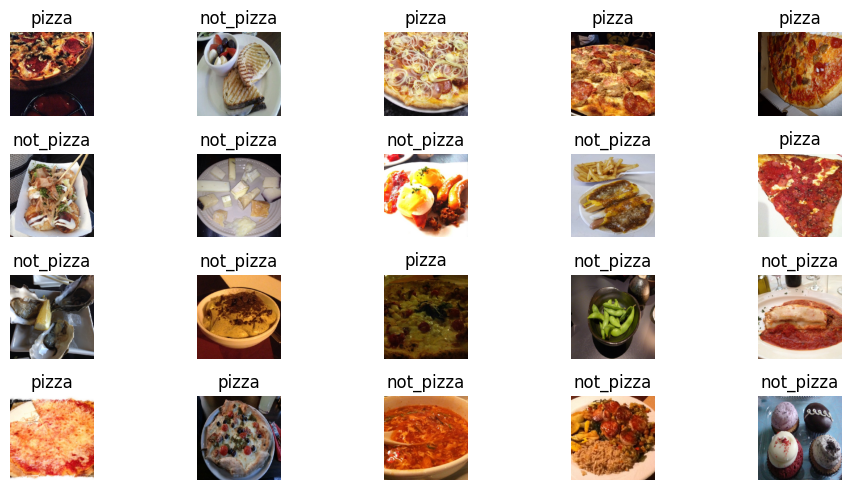

In [20]:
# Usage example:
# Assuming 'images', 'labels', and 'class_names' are defined elsewhere
# Adjust these variables with your actual data
plot_images(images, labels, class_names, num_images=20)